Завантажте датасет і збережіть його у *.CSV форматі.
Рекомендовані вимоги до набору даних:
Наявність кількох стовпців числового формату.
Як мінімум один категоріальний стовпець (тип "category" або "object").
Якщо набір містить більше 1000 рядків, скопіюйте перших 1000 рядків для
подальшої роботи.

In [576]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Literal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

1. Завантаження даних
Завантажте обраний dataset у Python за допомогою Pandas.
Переконайтесь, що дані успішно завантажені та відображаються коректно.

In [577]:
df = pd.read_csv("./datasets/Most popular 1000 Youtube videos.csv")

2. Розвідувальний аналіз даних (EDA)
Ознайомтесь з даними:

Опишіть змінні, їх типи та статистичні характеристики 
(середнє значення, медіана, стандартне відхилення тощо).
Візуалізуйте дані за допомогою гістограм.
Виявлення проблем:

Відсутні значення:
Якщо відсутніх значень немає, видаліть випадковим чином 1% значень
для числових стовпців, імплементувавши для цього окрему функцію в межах відповідного класу.
Викиди (outliers):
Якщо викидів немає, додайте декілька викидів у числовий стовпець
(за допомогою спеціальної функції в класі).
Категоріальні змінні:
Якщо категоріальних стовпців немає, додайте такий стовпець та заповніть
його значеннями на основі аналізу інших стовпців.

In [578]:
df.shape

(1000, 7)

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [580]:
df.describe()

,rank,published
count,1000.000000,1000.000000
mean,500.500000,2019.100000
std,288.819436,5.384328
min,1.000000,2005.000000
25%,250.750000,2017.000000
50%,500.500000,2021.000000
75%,750.250000,2024.000000
max,1000.000000,2025.000000


In [581]:
df['Video views'] = df['Video views'].str.replace(',', '').astype(float)
df['Likes'] = df['Likes'].str.replace(',', '').astype(float)
df['Dislikes'] = df['Dislikes'].str.replace(',', '').astype(float)

In [582]:
missing_values = df.isnull().sum()

In [583]:
missing_values

rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64

3. Обробка відсутніх значень
Оберіть стратегію обробки відсутніх значень:
Видалення
Заповнення середнім, медіаною або модою
Обґрунтуйте свій вибір.
Реалізуйте обрану стратегію за допомогою Pandas.

In [584]:
df['Dislikes'] = df['Dislikes'].fillna(df['Dislikes'].median())

In [585]:
missing_values = df.isnull().sum()

In [586]:
missing_values

rank            0
Video           0
Video views     0
Likes           0
Dislikes        0
Category       18
published       0
dtype: int64

4. Кодування категоріальних змінних
Оберіть метод кодування:
One-hot encoding
Label encoding
Обґрунтуйте свій вибір.
Реалізуйте обраний метод за допомогою Pandas.

I chose pd.get_dummies() because it is a simple and efficient way to apply One-Hot Encoding in Pandas. It automatically creates binary columns for each category and handles multiple categorical variables easily.

In [587]:
df_encoded = pd.get_dummies(df, columns=['Category'])

In [588]:
df_encoded

,rank,Video,Video views,Likes,Dislikes,published,Category_Autos & Vehicles,Category_Comedy,Category_Education,Category_Entertainment,...,Category_Gaming,Category_Howto & Style,Category_Music,Category_News & Politics,Category_Nonprofits & Activism,Category_People & Blogs,Category_Pets & Animals,Category_Science & Technology,Category_Sports,Category_Travel & Events
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,5.407168e+07,3497955.0,78799.0,2019,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2,"20 Tennis shots if they were not filmed, NOBOD...",3.471237e+06,19023.0,859.0,2017,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,JoJo Siwa - Karma (Official Video),3.420675e+07,293563.0,477.0,2024,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,4,David Kushner - Daylight (Official Music Video),1.855839e+07,680732.0,477.0,2023,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,6.547981e+09,44428537.0,477.0,2015,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,New Champ Kayn/Rhaast Leak for LOL (Moobeat cr...,8.472490e+05,1857.0,173.0,2017,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
996,997,Ford Mustang Launch (street),1.001605e+06,2214.0,27.0,2008,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,998,Eminem is gay - The Interview,2.718939e+06,43492.0,0.0,2014,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
998,999,Yakuza OST - Baka Mitai (ばかみたい) Kiryu full ver...,5.289099e+07,850425.0,0.0,2017,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [589]:
numeric_cols = ['Video views', 'Likes', 'Dislikes', 'published']

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [590]:
df_encoded

,rank,Video,Video views,Likes,Dislikes,published,Category_Autos & Vehicles,Category_Comedy,Category_Education,Category_Entertainment,...,Category_Gaming,Category_Howto & Style,Category_Music,Category_News & Politics,Category_Nonprofits & Activism,Category_People & Blogs,Category_Pets & Animals,Category_Science & Technology,Category_Sports,Category_Travel & Events
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,0.117617,1.921530,10.953841,-0.018582,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2,"20 Tennis shots if they were not filmed, NOBOD...",-0.083873,-0.214615,-0.083622,-0.390216,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,JoJo Siwa - Karma (Official Video),0.038515,-0.046041,-0.137718,0.910504,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,4,David Kushner - Daylight (Official Music Video),-0.023796,0.191690,-0.137718,0.724687,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,25.976233,27.053847,-0.137718,-0.761850,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,New Champ Kayn/Rhaast Leak for LOL (Moobeat cr...,-0.094322,-0.225155,-0.180769,-0.390216,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
996,997,Ford Mustang Launch (street),-0.093707,-0.224936,-0.201445,-2.062570,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,998,Eminem is gay - The Interview,-0.086869,-0.199590,-0.205269,-0.947667,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
998,999,Yakuza OST - Baka Mitai (ばかみたい) Kiryu full ver...,0.112916,0.295885,-0.205269,-0.390216,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [591]:
correlation_matrix = df[numeric_cols].corr(method='pearson')

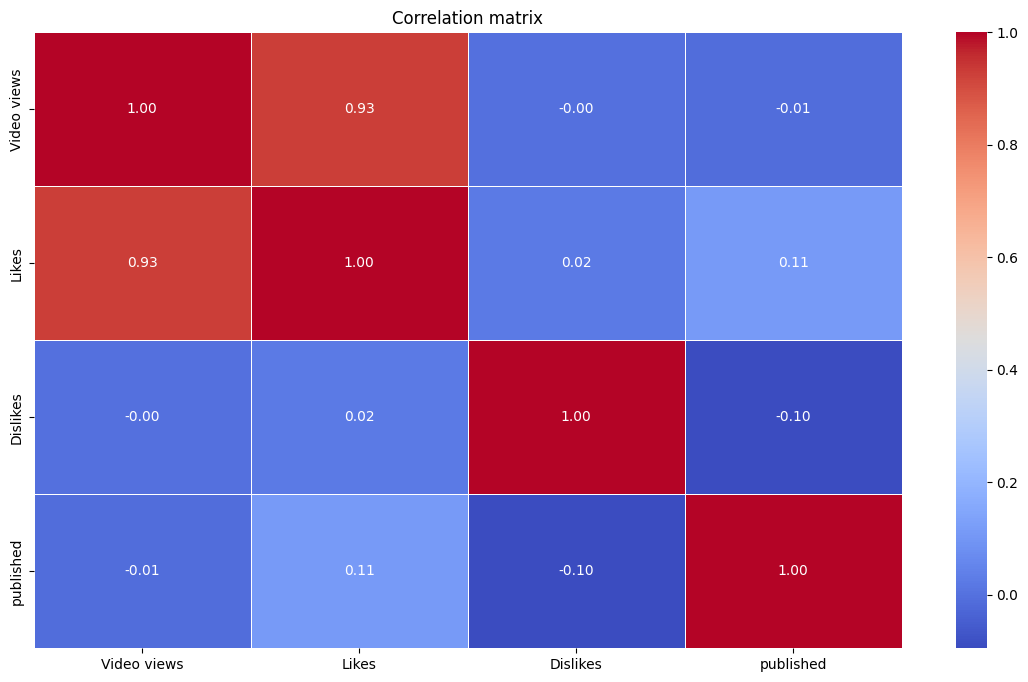

In [592]:
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

Not surprising that Video views have hight correlation with number of likes

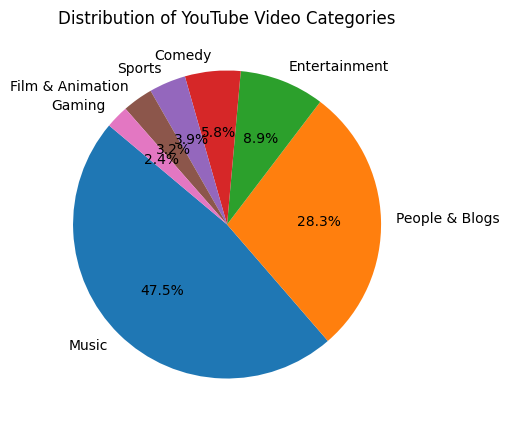

In [593]:
category_counts = df["Category"].value_counts()

threshold = 0.02 * category_counts.sum() 
filtered_categories = category_counts[category_counts >= threshold]

plt.figure(figsize=(10, 5))
plt.pie(filtered_categories, labels=filtered_categories.index, autopct='%1.1f%%', startangle=140)

plt.title("Distribution of YouTube Video Categories")

plt.show()


Never thought that the most popular topic in youtube will be Music

6. Розділення даних на навчальний та тестовий набір
Розділіть дані у співвідношенні 80/20 або 70/30.
Загальні рекомендації:
Створіть класи для кожного етапу обробки даних:
Клас для завантаження даних.
Клас для обробки відсутніх значень.
Клас для кодування категоріальних змінних тощо.
Кожен клас повинен містити методи для виконання відповідних операцій.
Використовуйте ООП для організації коду та підвищення його читабельності та
масштабованості.

7. Завдання ч.2 (додаткове)
По аналогії до функції process_data_titanic
(де кожен клас працює з вихідною таблицею, а зміни не накопичуються)
імплементувати універсальний метод process_data_custom,
у якому зміни повинні накопичуватися.
Ця функція повинна використовувати методи класів для обробки
довільного набору даних.
Якщо немає числових або категоріальних стовпців, імплементуйте
функціонал для їх автоматичного додавання.
Формат звіту:
Звіт повинен містити:

Код програми на Python із коментарями та обґрунтуваннями.


In [594]:
class DataLoader:
    def __init__(self, file_path: str):
        self.df: pd.DataFrame = pd.read_csv(file_path)
    
    def get_data(self) -> pd.DataFrame:
        return self.df
    
class TypeConverter:
    def __init__(self, dataframe: pd.DataFrame):
        self.df: pd.DataFrame = dataframe
    
    def convert_to_numeric(self, cols):
        for col in cols:
            self.df[col] = self.df[col].astype(str).str.replace(',', '', regex=True).astype(float)
    
    def get_data(self) -> pd.DataFrame:
        return self.df

class MissingValuesHandler:
    def __init__(self, dataframe: pd.DataFrame):
        self.df: pd.DataFrame = dataframe

    def fill_missing_values(self, col: str, fill_type: Literal["median", "mode"]):
        if fill_type == "median":
            self.df[col] = self.df[col].fillna(self.df[col].median())
        elif fill_type == "mode":
            self.df[col] = self.df[col].fillna(self.df[col].mode()[0])
    
    def get_data(self) -> pd.DataFrame:
        return self.df

class CategoricalEncoder:
    def __init__(self, dataframe: pd.DataFrame):
        self.df: pd.DataFrame = dataframe
    
    def encode_categories(self, cols):
        self.df = pd.get_dummies(self.df, columns=cols)
    
    def get_data(self) -> pd.DataFrame:
        return self.df

class FeatureScaler:
    def __init__(self, dataframe: pd.DataFrame):
        self.df: pd.DataFrame = dataframe
    
    def apply_scaling(self, numeric_cols):
        scaler = StandardScaler()
        self.df[numeric_cols] = scaler.fit_transform(self.df[numeric_cols])
    
    def get_data(self) -> pd.DataFrame:
        return self.df

class DataSplitter:
    def __init__(self, dataframe: pd.DataFrame, test_size: float = 0.2):
        self.df: pd.DataFrame = dataframe
        self.test_size: float = test_size
    
    def split_data(self, target_col: str, drop_cols):
        X = self.df.drop(columns=drop_cols)
        y = self.df[target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=101)
        return X_train, X_test, y_train, y_test

class DataProcessor:
    def __init__(self, file_path: str):
        self.data_loader = DataLoader(file_path)
        self.df: pd.DataFrame = self.data_loader.get_data()
    
    def process_data(self):
        type_converter = TypeConverter(self.df)
        type_converter.convert_to_numeric(cols=['Video views', 'Likes', 'Dislikes'])
        self.df = type_converter.get_data()

        missing_handler = MissingValuesHandler(self.df)
        missing_handler.fill_missing_values(col="Dislikes", fill_type="median")
        self.df = missing_handler.get_data()

        encoder = CategoricalEncoder(self.df)
        encoder.encode_categories(['Category'])
        self.df = encoder.get_data()

        scaler = FeatureScaler(self.df)
        scaler.apply_scaling(['Video views', 'Likes', 'Dislikes', 'published'])
        self.df = scaler.get_data()

        splitter = DataSplitter(self.df, test_size=0.2)
        X_train, X_test, y_train, y_test = splitter.split_data(target_col="Video views", drop_cols=["rank"])

        return X_train, X_test, y_train, y_test

processor = DataProcessor("./datasets/Most popular 1000 Youtube videos.csv")
X_train, X_test, y_train, y_test = processor.process_data()


In [595]:
(X_train, X_test, y_train, y_test)

(                                                 Video  Video views     Likes  \
 423  Dave Chappelle on Martin Lawrence and Hollywoo...    -0.093174 -0.222001   
 157                                         Prohibidox    -0.069226 -0.158978   
 670                Pouring water down a 50 meter well.    -0.095031 -0.221743   
 256    Mulatto - Muwop (Official Video) ft. Gucci Mane    -0.093522 -0.186721   
 965   Lo mas tierno de Hoy #respetoanimal #shortsviral     0.018444  0.028388   
 ..                                                 ...          ...       ...   
 575  It Got Grandma!: Chimp at Zoo Throws Poo in Gr...    -0.081867 -0.211067   
 838  Alicia Keys How to Save A Life (the Fray Cover...    -0.093815 -0.225354   
 337  Dani Ribba, Tiago PZK - Cuando Me Ves (Officia...    -0.093727 -0.121239   
 523                                     basic instinct    -0.071874 -0.225619   
 863                 Children Of Bodom - "In Your Face"    -0.054110 -0.199002   
 
      Dislikes

Data processing pipeline efficiently step by step prepares YouTube video data for future machine learning. It handles: numeric conversions, missing values, categorical encoding, feature scaling, and data splitting.